In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt

# Historical

In [2]:
# Historical
IPSL_CM6A_LR_CNN = load('../../June2021/Model_plots/IPSL-CM6A-LR-CNN-Y1.joblib').sel(time=slice('1980-12-1','2014-1-31'))
IPSL_CM6A_LR_CNN

<xarray.DataArray 'yLR' (time: 2108)>
array([0.42862546, 0.5335456 , 0.5543963 , ..., 0.49875778, 0.4819796 ,
       0.4246024 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01T12:00:00 ... 2014-01-31T12:00:00

In [3]:
zLevData = xr.open_dataset('../../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_zg_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')
zLevData
zAll=zLevData.sel(plev=50000,method='nearest').zg
z=zAll[((zAll.time.dt.month>11) | (zAll.time.dt.month<2)) & (zAll.time.dt.year<2020)].sel(time=slice('1980-12-1','2014-1-31'))
z


## Calculate daily Anomaly
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2014-1-31'))
IPSL_CM6A_LR_CNN['time'] = decJanAnomz.time
da


<xarray.DataArray 'zg' (time: 2108, latitude: 46, longitude: 180)>
[17454240 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-12-01T12:00:00 ... 2014-01-31T12:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float32 5e+04
    month_day  (time) object '12-01' '12-02' '12-03' ... '01-29' '01-30' '01-31'
Attributes:
    standard_name:       geopotential_height
    long_name:           Geopotential Height
    units:               m
    online_operation:    average
    cell_methods:        time: mean
    interval_operation:  900 s
    interval_write:      1 d
    description:         Geopotential Height
    history:             none
    cell_measures:       area: areacella

In [4]:
# get WFD daily anomaly
wfdZ=decJanAnomz[IPSL_CM6A_LR_CNN >0.46,:,:]
wfdZ.time
wfdZ
print(wfdZ.time.shape)

ndays=wfdZ.time.shape[0]
ndays

(330,)


330

In [5]:
# Composite of WFD
# Get Composite anomoaly for fog days
wfdComp_Hist=wfdZ.mean(dim="time")

# SSP

In [6]:
## CF Future
ssps=['126','245','370','585']
#ssps=['370']

(392,)
<xarray.DataArray 'zg' (latitude: 46, longitude: 180)>
array([[35.194794 , 35.194794 , 35.194794 , ..., 35.194794 , 35.194794 ,
        35.194794 ],
       [30.87806  , 30.854172 , 30.826029 , ..., 30.958242 , 30.931793 ,
        30.905956 ],
       [26.612312 , 26.507317 , 26.398058 , ..., 26.867199 , 26.786798 ,
        26.702389 ],
       ...,
       [-3.0925415, -3.175411 , -3.2488215, ..., -2.7969275, -2.9008641,
        -3.0146723],
       [-3.14575  , -3.2278607, -3.2817461, ..., -2.8963351, -2.9729009,
        -3.0674953],
       [-3.1623027, -3.226321 , -3.2761421, ..., -2.9716914, -3.0136096,
        -3.0797071]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float32 5e+04


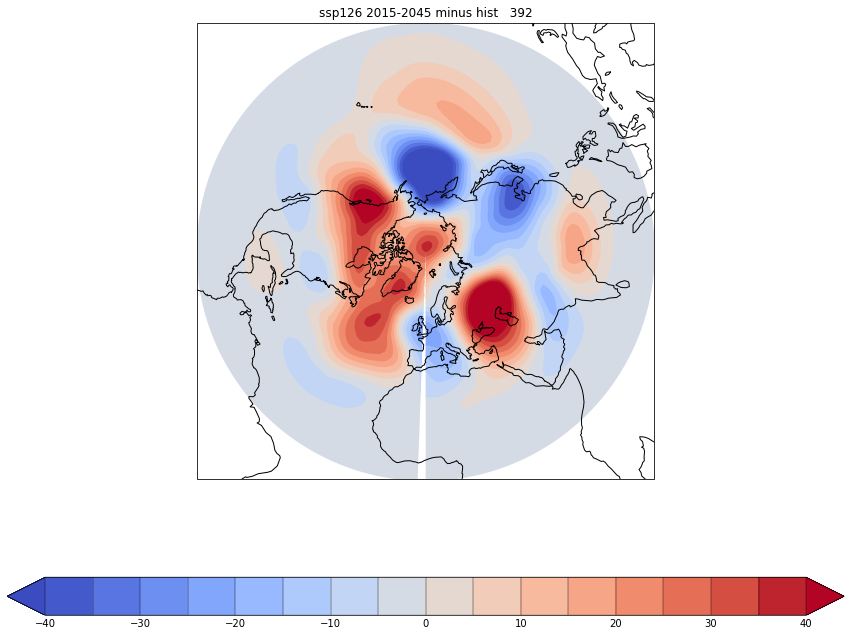

(590,)
<xarray.DataArray 'zg' (latitude: 46, longitude: 180)>
array([[14.961895 , 14.961895 , 14.961895 , ..., 14.961895 , 14.961895 ,
        14.961895 ],
       [15.899738 , 15.992387 , 16.07068  , ..., 15.620806 , 15.721327 ,
        15.815247 ],
       [16.940954 , 17.067947 , 17.175034 , ..., 16.453396 , 16.635464 ,
        16.799026 ],
       ...,
       [-3.2273457, -3.2818928, -3.3278387, ..., -3.001734 , -3.0933063,
        -3.1803358],
       [-3.1836553, -3.247962 , -3.286394 , ..., -3.034763 , -3.0844383,
        -3.1426384],
       [-3.181868 , -3.2577767, -3.3024828, ..., -3.0926247, -3.1025832,
        -3.1333644]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float32 5e+04


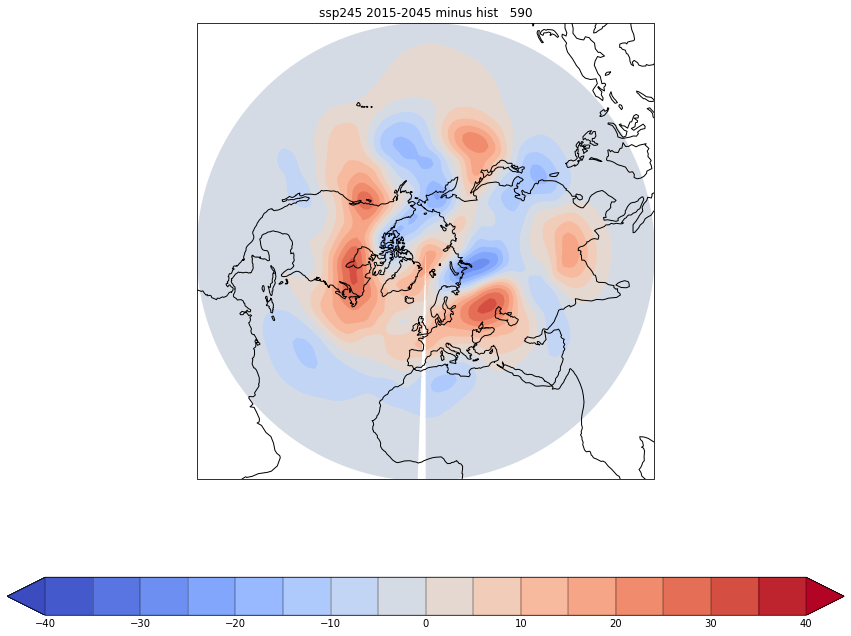

(504,)
<xarray.DataArray 'zg' (latitude: 46, longitude: 180)>
array([[13.312649 , 13.312649 , 13.312649 , ..., 13.312649 , 13.312649 ,
        13.312649 ],
       [12.109798 , 12.106993 , 12.088579 , ..., 12.149981 , 12.143631 ,
        12.131992 ],
       [11.048278 , 11.011778 , 10.960181 , ..., 11.077072 , 11.077624 ,
        11.068702 ],
       ...,
       [-4.019378 , -4.0355816, -4.044626 , ..., -3.926114 , -3.948262 ,
        -3.9938345],
       [-3.9758835, -4.00598  , -4.0122514, ..., -3.935735 , -3.9368916,
        -3.9619832],
       [-3.9594402, -4.0036635, -4.0149555, ..., -3.9619284, -3.936861 ,
        -3.9353938]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float32 5e+04


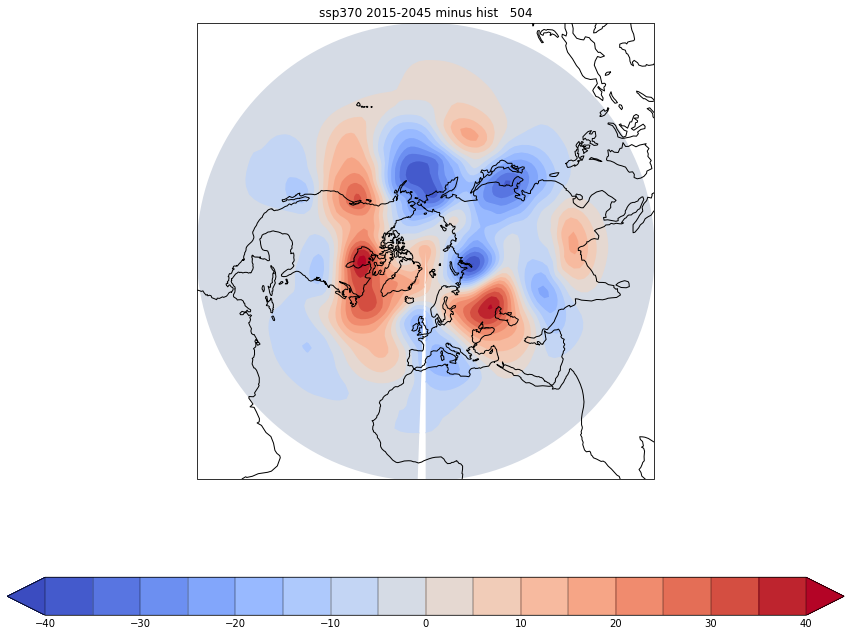

(474,)
<xarray.DataArray 'zg' (latitude: 46, longitude: 180)>
array([[21.866575 , 21.866575 , 21.866575 , ..., 21.866575 , 21.866575 ,
        21.866575 ],
       [18.860207 , 18.966845 , 19.065598 , ..., 18.567835 , 18.669127 ,
        18.766775 ],
       [15.321409 , 15.479045 , 15.627598 , ..., 14.773664 , 14.967633 ,
        15.149824 ],
       ...,
       [-6.202569 , -6.252042 , -6.2889295, ..., -6.031107 , -6.0890045,
        -6.155283 ],
       [-6.1634073, -6.221916 , -6.253751 , ..., -6.060811 , -6.083696 ,
        -6.124966 ],
       [-6.1488543, -6.215386 , -6.2550297, ..., -6.084218 , -6.087077 ,
        -6.1100492]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float32 5e+04


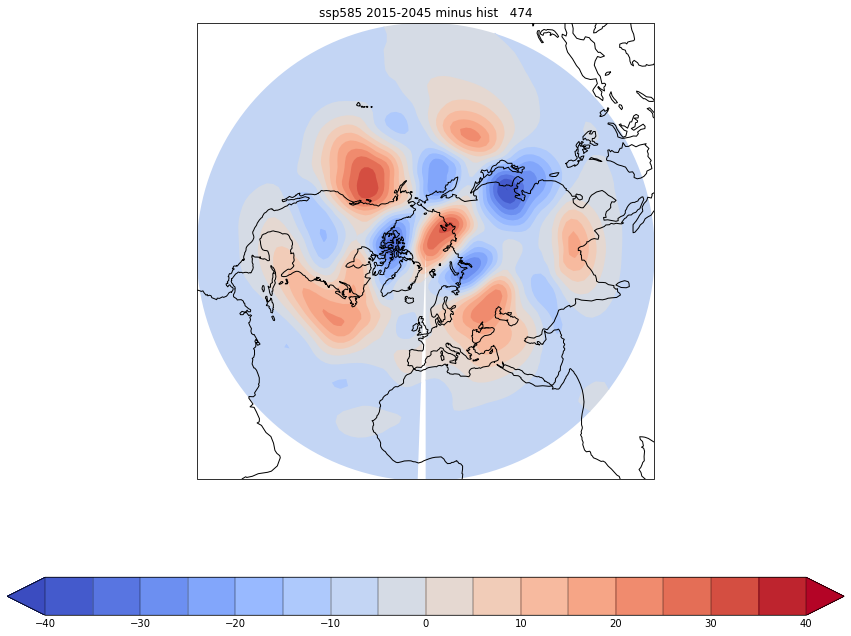

In [11]:

for sp in ssps :
    IPSL_CM6A_LR_CNN = load('../../June2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2015-1-1','2045-12-31'))
    IPSL_CM6A_LR_CNN
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'

    zLevData =  zLevData=xr.open_dataset(folderString+'Regrid_zg_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    zLevData
    zAll=zLevData.sel(plev=50000,method='nearest').zg
    z=zAll[((zAll.time.dt.month>11) | (zAll.time.dt.month<2))].sel(time=slice('2015-1-1','2045-12-31'))
    z


    ## Calculate daily Anomaly
    da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
    dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
    decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('2015-1-1','2045-12-31'))
    IPSL_CM6A_LR_CNN['time'] = decJanAnomz.time
    da


    # get WFD daily anomaly
    wfdZ=decJanAnomz[IPSL_CM6A_LR_CNN >0.46,:,:]
    wfdZ.time
    wfdZ
    print(wfdZ.time.shape)
    wfdComp=wfdZ.mean(dim="time")
    wfdDiff=wfdComp-wfdComp_Hist
    print(wfdDiff)

    ndays=wfdZ.time.shape[0]
    ndays

    wfdZComp_cube=wfdDiff.to_iris()
    wfdZComp_cube
#wfdZComp_cube_small=wfdComp.sel(latitude=slice(50,0),longitude=slice(30,120)).to_iris()
#wfdZComp_cube_small

    fig = plt.figure(figsize=(15,12))
    levels = (-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30,35,40)
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
#ax.set_global()

    # Northern Hemisphere from 23 degrees north:
    ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    qplt.contourf(wfdZComp_cube,cmap='coolwarm',levels=levels,extend='both')
    #qplt.contourf(wfdZComp_cube,cmap='coolwarm')
    ax.set_title('ssp'+sp+' 2015-2045 minus hist   '+str(ndays))
    ax.coastlines()
    plt.savefig('ssp'+sp+'_nearFuture_historical.eps')
    qplt.show()

#plt.show()
